In [1]:
# импортируем необходимые библиотеки
import numpy as np
import random
import matplotlib.pyplot as plt

# Part 1

In [2]:
# Функционирование системы. Вероятность потери клиента.

def system1(T_max):

    l = 5 # интенсивность входящего потока
    m = 2 # интенсивоность обслуживания
    g = 1 # количсевто нетерпеливых клиентов в ед. времени
    n = 4 # количество каналов
    
    opT = 0 # время работы системы
    T0 = 0 # момент прихода очередной заявки
    Tk = np.zeros(n) # очередные моменты освобождения k-ого канала
    
    ac = 0 # всего клиентов
    ic = 0 # количесвто нетерпеливых клиентов
    nsc = 0 # количество необслуженных клиентов
    sc = 0 # количество обслуженных клиентов: sc=ac-ic-nsc
    
    while True:
        
        T0 = random.expovariate(lambd=l) # пришла заявка
        opT += T0
        if opT >= T_max:
            sc = ac - ic - nsc
            break
        
        ac += 1

        # функционирование системы
        t = min(opT, min(Tk))
        if t == min(Tk): # канал освободился?
            i = np.nonzero(Tk < opT)[0][0]
            Tk[i] = opT + random.expovariate(lambd=m)
            if Tk[i] > T_max:
                nsc += 1

        else: # свободных каналов нет
            wt = random.expovariate(lambd=g)
            if wt + opT < min(Tk): # до освобождения канала больше времени, 
                                  # чем готов ждать нетерпеливый клиент?
                ic += 1

            else: # нетерпеливый клиент успеет обслужиться
                j = np.argmin(Tk)
                Tk[j] += random.expovariate(lambd=m)
                if Tk[j] > T_max:
                    nsc += 1
            
    return ic / ac

In [3]:
Plc = 0
for i in range(100):
    Plc += system1(10000) / 100
print('Вероятность потери клиента, Plc =', Plc)

Вероятность потери клиента, Plc = 0.04855702083475444


# Part 2

In [4]:
# Доход. Срок окупаемости. Нетерпеливые клиенты.

def system2(T_max):

    l = 12 # интенсивность входящего потока
    m = 2 # интенсивоность обслуживания
    g = 5 # количсевто нетерпеливых клиентов в ед. времени
    n = 4 # количество каналов
    
    S = 5000 # начальный капитал
    c0 = 7 # прибыль за обслуживание одной заявки
    c1 = 5 # штраф за уход требования
    c2 = 3 # штраф в единицу времени за ожидание заявки
    c3 = 20 # затраты в единицу времени на обслуживание приборов
    income = 0
    
    opT = 0 # время работы системы
    T0 = 0 # момент прихода очередной заявки
    Tk = np.zeros(n) # очередные моменты освобождения k-ого канала
    
    ac = 0
    ic = 0
    
    while True:
        
        T0 = random.expovariate(lambd=l)
        opT += T0
        if opT >= T_max or income >= S:
            break
        
        ac += 1
        income -= T0 * c3 # затраты на обслуживание системы

        # функционирование системы
        t = min(opT, min(Tk))        
        if t == min(Tk): # канал освободился?
            i = np.nonzero(Tk < opT)[0][0]
            Tk[i] = opT + random.expovariate(lambd=m)
            income += c0 # прибыль за обслуживание

        else: # свободных каналов нет
            wt = random.expovariate(lambd=g)
            if wt + opT < min(Tk): # до освобождения канала больше времени, 
                                   # чем готов ждать нетерпеливый клиент?
                ic += 1
                income -= c1 # штраф за ушедшего клиента
                income -= wt * c2 # штраф за ожидание в очереди

            else: # нетерпеливый клиент успеет обслужиться
                income -= (min(Tk) - opT) * c2 # штраф за ожидание в очереди
                j = np.argmin(Tk)
                Tk[j] += random.expovariate(lambd=m)
                income += c0 # прибыль за обслуживание
            
    return income, opT, ic / ac

In [5]:
# S = []; T = []; C = []
# for i in range(1000):
#     s1, t1, c1, = system2(10000)
#     S.append(s1); T.append(t1); C.append(c1)
# print('Полученный доход S =', sum(S) / 1000)
# print('Средний срок окупаемости T =', sum(T) / 1000)
# print('Доля нетерпеливых клиентов Pic =', sum(C) / 1000)

In [6]:
S = []; T = []; C = []
for i in range(100):
    s1, t1, c1, = system2(5000)
    S.append(s1); T.append(t1); C.append(c1)
print('Полученный доход S =', sum(S) / 100)
print('Средний срок окупаемости T =', sum(T) / 100)
print('Доля нетерпеливых клиентов Pic =', sum(C) / 100)

Полученный доход S = 5002.237105650275
Средний срок окупаемости T = 1586.1248102573152
Доля нетерпеливых клиентов Pic = 0.4012137872177261


# Part 3

In [7]:
# Доход. Срок окупаемости. Управление.

def system3(threshold, T_max):

    l = 12 # интенсивность входящего потока
    m = 2 # интенсивоность обслуживания
    g = 5 # количсевто нетерпеливых клиентов в ед. времени
    n = 4 # количество каналов
    
    S = 5000 # начальный капитал
    c0 = 7 # прибыль за обслуживание одной заявки
    c1 = 5 # штраф за уход требования
    c2 = 3 # штраф в единицу времени за ожидание заявки
    c3 = 20 # затраты в единицу времени на обслуживание приборов
    c4 = 2 # штраф за недопуск заявки в систему
    income = 0
    
    opT = 0 # время работы системы
    T0 = 0 # момент прихода очередной заявки
    Tk = np.zeros(n) # очередные моменты освобождения k-ого канала
    
    state = [0, 0] # количество заявок на каналах и в очереди 
                   # перед приходом очередного требования
    L = 0 # длина очереди
    mQ = [] # время ухода клиента из очереди
    
    pk = 0 # вероятность допуска заявки в систему
    
    ac = 0 # всего клиентов
    ic = 0 # нетерпеливые клиенты
    rc = 0 # недопущенные к обслуживанию клиенты
    
    while True:
        
        # определение состояния системы
        if L == 0: # очередь пуста?
            state[0] = n - np.nonzero(Tk <= opT)[0].size # всего - свободные
            state[1] = L # длина очереди 0
        
        else: # очередь не пуста
            i = np.nonzero(np.array(mQ) <= opT)[0]
            j = np.nonzero(np.array(mQ) <= opT)[0].size
            mQ = list(np.delete(mQ, i))
            L -= j
            state[0] = n
            state[1] = L        
        
        T0 = random.expovariate(lambd=l)
        opT += T0
        if opT >= T_max or income >= S:
            break
        
        ac += 1
        income -= T0 * c3 # затраты на обслуживание системы
        
        # управление
        if sum(state) < threshold:
            pk = 1
        else:
            pk = 0
        if pk == 0:
            income -= c4
            rc += 1
            continue
        
        # функционирование системы
        t = min(opT, min(Tk))        
        if t == min(Tk): # канал освободился?
            i = np.nonzero(Tk < opT)[0][0]
            Tk[i] = opT + random.expovariate(lambd=m)
            income += c0 # прибыль за обслуживание

        else: # свободных каналов нет
            L += 1
            wt = random.expovariate(lambd=g)
            if wt + opT < min(Tk): # до освобождения канала больше времени, 
                                   # чем готов ждать нетерпеливый клиент?
                income -= c1 # штраф за ушедшего клиента
                income -= wt * c2 # штраф за ожидание в очереди
                mQ.append(wt + opT)
                ic += 1

            else: # нетерпеливый клиент успеет обслужиться
                income -= (min(Tk) - opT) * c2 # штраф за ожидание в очереди
                income += c0 # прибыль за обслуживание
                
                j = np.argmin(Tk)
                Tk[j] += random.expovariate(lambd=m)
                
                mQ.append(min(Tk))
            
    return income, opT, ic / ac, rc

In [8]:
arr = []
for i in range(5, 16):
    print('Please, wait... Code:', i)
    t = 0
    for j in range(100):
        t += system3(i, 2000)[1] / 100
    arr.append(t)
print(arr)

Please, wait... Code: 5
Please, wait... Code: 6
Please, wait... Code: 7
Please, wait... Code: 8
Please, wait... Code: 9
Please, wait... Code: 10
Please, wait... Code: 11
Please, wait... Code: 12
Please, wait... Code: 13
Please, wait... Code: 14
Please, wait... Code: 15
[522.1134620246349, 502.1518144999392, 554.3766809427323, 724.4319140286404, 999.1357756151325, 1269.5724482817757, 1399.838115548707, 1538.4313113342814, 1517.294023231765, 1546.358762479719, 1575.5632087314245]


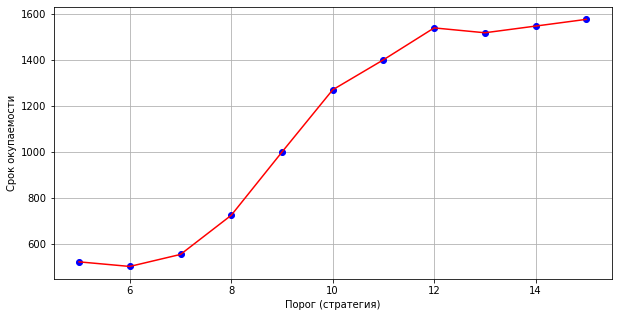

In [9]:
x = np.arange(5, 16)
plt.figure(figsize=(10, 5))
plt.plot(x, arr, 'bo')
plt.plot(x, arr, 'r-')
plt.xlabel('Порог (стратегия)')
plt.ylabel('Срок окупаемости')
plt.grid()
plt.show()